<a href="https://colab.research.google.com/github/angel870326/Hierarchical-Clustering/blob/main/word_cloud_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2022.04.05 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

#**Word Cloud for Clusters**



####**Contents:**

1. Create a DataFrame for Each Cluster<br/>
2. Functions<br/>
3. Word Cloud<br/>
4. Cluster Comparison by Weights<br/>

<br/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import os
from os import path

In [2]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
font = 'TaipeiSansTCBeta-Regular.ttf'

--2022-04-09 15:09:59--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.81.206, 2607:f8b0:4004:82f::200e
Connecting to drive.google.com (drive.google.com)|142.250.81.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7l8ubh79ns3pgp3rplqtike083e001q0/1649517000000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-04-09 15:10:03--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7l8ubh79ns3pgp3rplqtike083e001q0/1649517000000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.217.15.65, 2607:f8b0:4004:810::2001
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|172.217.15.65|:443... co

In [ ]:
# !wget -O house.jpeg 'https://drive.google.com/file/d/1gv4KZOywnkQkfm3vW1qXX_0hT9l9Ub-T/view?usp=sharing'
# image = "house.jpeg"
# d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
# mask = np.array(Image.open(path.join(d, "house.jpeg")))

In [3]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


##**1. Create a DataFrame for Each Cluster**


---



In [4]:
data = pd.read_csv('/content/gdrive/My Drive/碩一下/Capstone/hierarchical_clustering/hierarchical_textcluster_v2.csv')
cluster_complete_3 = data[['c0101', 'content', 'cluster_complete_3']]
cluster_complete_4 = data[['c0101', 'content', 'cluster_complete_4']]
cluster_avg_3 = data[['c0101', 'content', 'cluster_avg_3']]
cluster_avg_6 = data[['c0101', 'content', 'cluster_avg_6']]
cluster_ward_3 = data[['c0101', 'content', 'cluster_ward_3']]
cluster_ward_4 = data[['c0101', 'content', 'cluster_ward_4']]

cluster_complete_3

,c0101,content,cluster_complete_3
0,0000001,"西南,24小時,重點,三十一年至三十五年屋齡,少戶數,鋼筋混凝土,小公設比,近一年有實價登錄...",3
1,0000008,"西南,24小時,一般,二十六年至三十年屋齡,少戶數,鋼筋混凝土,中公設比,近一年無實價登錄,...",3
2,0000010,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,鋼骨鋼筋混凝土,小公設比,近一年有實價...",3
3,0000011,"西南,日間管理,一般,二十六年至三十年屋齡,少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,...",1
4,0000012,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,鋼筋混凝土,中公設比,近一年無實價登錄...",3
...,...,...,...
18191,Y001265,"南,24小時,重點,十一年至十五年屋齡,少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,臨多...",2
18192,Y001266,"北,24小時,重點,六年至十年屋齡,多戶數,鋼筋混凝土,大公設比,近一年有實價登錄,有平面車...",3
18193,Y001273,"西,24小時,重點,十一年至十五年屋齡,極少戶數,鋼筋混凝土,大公設比,近一年無實價登錄,有...",2
18194,Y001276,"24小時,一般,十一年至十五年屋齡,極少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,臨多線...",2


##**2. Functions**


---



In [5]:
# Build a dataframe for a cluster 
def clusterdf(method,column,clusterID):
  return method[method[column] == clusterID]

# Extract all the contents from a cluster
def textList(cluster):
  text_list = cluster.iloc[0,1]
  for i in range(1,len(cluster.index)-1):
    text_list = text_list + ',' + cluster.iloc[i,1]
  text_list = text_list.split(',')
  return text_list

# Word cloud
def createWordCloud(dictionary):
  # mask = np.array(Image.open(image))
  # mask = imageio.imread("house.jpeg")
  # return WordCloud(margin=0, font_path=font, background_color='white').generate_from_frequencies(dictionary)
  return WordCloud(margin=0, font_path=font, background_color='white').generate_from_frequencies(dictionary)

# Show Cloud
def showWordCloud(cloud):
  plt.figure(figsize=(10, 5))
  plt.axis("off")
  plt.imshow(cloud, interpolation='bilinear')


##**3. Word Cloud**


---



###**3.1 Complete-Link Cluster**

####3 clusters

complete3_1 size:  6835
complete3_2 size:  3739
complete3_3 size:  7622


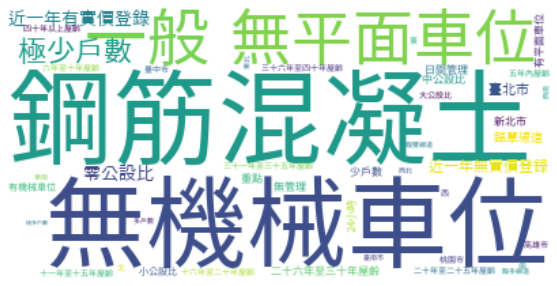

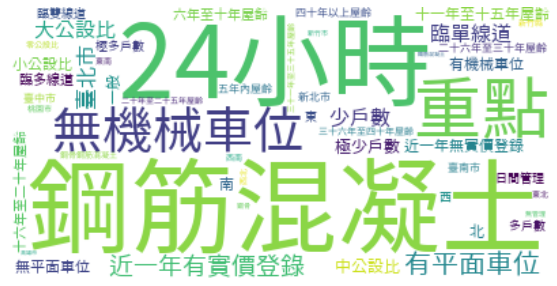

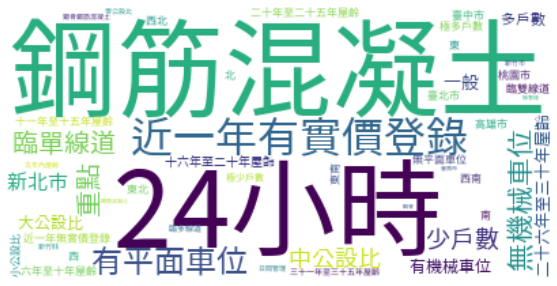

In [6]:
complete3_1 = clusterdf(cluster_complete_3,'cluster_complete_3',1)
complete3_2 = clusterdf(cluster_complete_3,'cluster_complete_3',2)
complete3_3 = clusterdf(cluster_complete_3,'cluster_complete_3',3)

# Cluster 1
print("complete3_1 size: ", len(complete3_1.index))
text_c3_1 = textList(complete3_1)
dict_c3_1 = Counter(text_c3_1)

wordcloud_c3_1 = createWordCloud(dict_c3_1)
wordcloud_c3_1.words_ # check all the words with associated weights
showWordCloud(wordcloud_c3_1)

# Cluster 2
print("complete3_2 size: ", len(complete3_2.index))
text_c3_2 = textList(complete3_2)
dict_c3_2 = Counter(text_c3_2)

wordcloud_c3_2 = createWordCloud(dict_c3_2)
wordcloud_c3_2.words_ # check all the words with associated weights
showWordCloud(wordcloud_c3_2)

# Cluster 3
print("complete3_3 size: ", len(complete3_3.index))
text_c3_3 = textList(complete3_3)
dict_c3_3 = Counter(text_c3_3)

wordcloud_c3_3 = createWordCloud(dict_c3_3)
wordcloud_c3_3.words_ # check all the words with associated weights
showWordCloud(wordcloud_c3_3)


####4 clusters

complete4_1 size:  4220
complete4_2 size:  2615
complete4_3 size:  3739
complete4_4 size:  7622


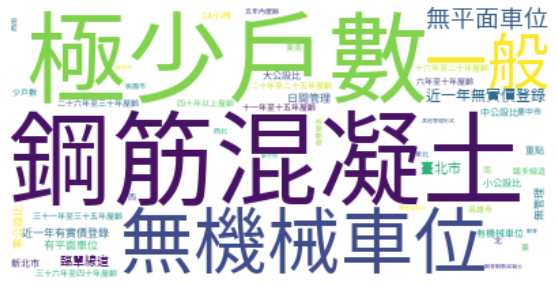

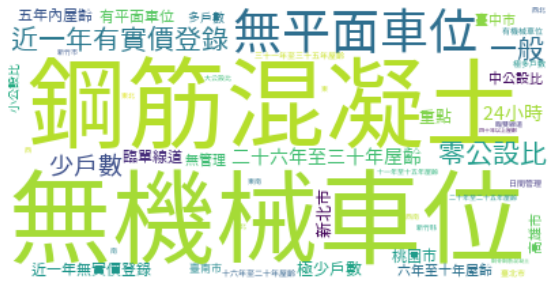

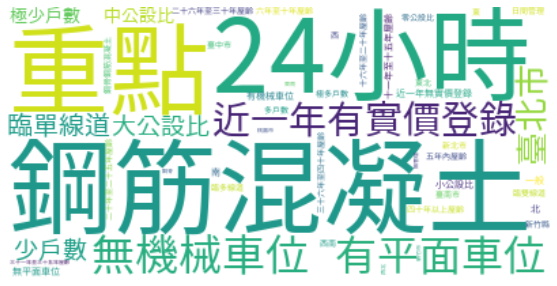

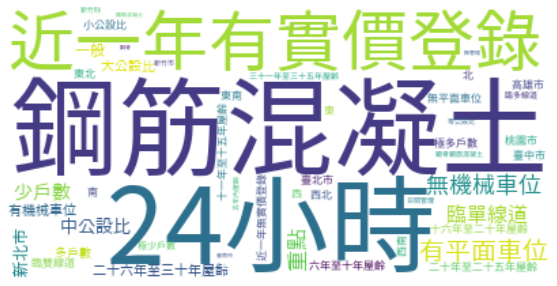

In [7]:
complete4_1 = clusterdf(cluster_complete_4,'cluster_complete_4',1)
complete4_2 = clusterdf(cluster_complete_4,'cluster_complete_4',2)
complete4_3 = clusterdf(cluster_complete_4,'cluster_complete_4',3)
complete4_4 = clusterdf(cluster_complete_4,'cluster_complete_4',4)

# Cluster 1
print("complete4_1 size: ", len(complete4_1.index))
text_c4_1 = textList(complete4_1)
dict_c4_1 = Counter(text_c4_1)

wordcloud_c4_1 = createWordCloud(dict_c4_1)
wordcloud_c4_1.words_ # check all the words with associated weights
showWordCloud(wordcloud_c4_1)

# Cluster 2
print("complete4_2 size: ", len(complete4_2.index))
text_c4_2 = textList(complete4_2)
dict_c4_2 = Counter(text_c4_2)

wordcloud_c4_2 = createWordCloud(dict_c4_2)
wordcloud_c4_2.words_ # check all the words with associated weights
showWordCloud(wordcloud_c4_2)

# Cluster 3
print("complete4_3 size: ", len(complete4_3.index))
text_c4_3 = textList(complete4_3)
dict_c4_3 = Counter(text_c4_3)

wordcloud_c4_3 = createWordCloud(dict_c4_3)
wordcloud_c4_3.words_ # check all the words with associated weights
showWordCloud(wordcloud_c4_3)

# Cluster 4
print("complete4_4 size: ", len(complete4_4.index))
text_c4_4 = textList(complete4_4)
dict_c4_4 = Counter(text_c4_4)

wordcloud_c4_4 = createWordCloud(dict_c4_4)
wordcloud_c4_4.words_ # check all the words with associated weights
showWordCloud(wordcloud_c4_4)

###**3.2 Group Average Cluster**

####3 clusters

avg3_1 size:  2485
avg3_2 size:  9033
avg3_3 size:  6678


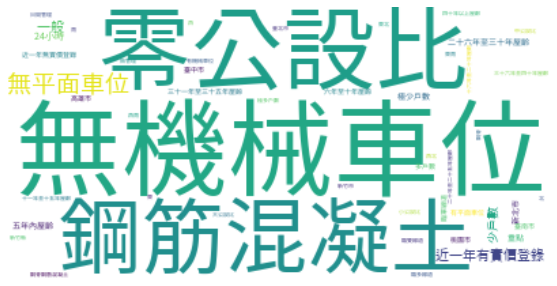

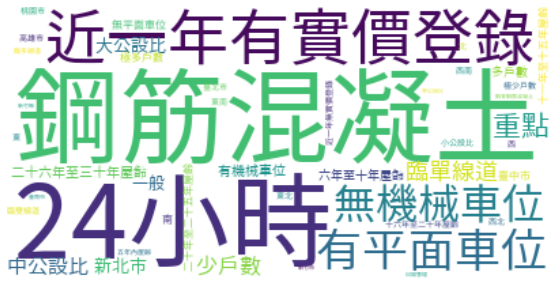

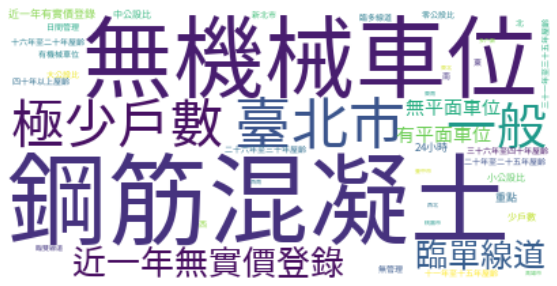

In [8]:
avg3_1 = clusterdf(cluster_avg_3,'cluster_avg_3',1)
avg3_2 = clusterdf(cluster_avg_3,'cluster_avg_3',2)
avg3_3 = clusterdf(cluster_avg_3,'cluster_avg_3',3)

# Cluster 1
print("avg3_1 size: ", len(avg3_1.index))
text_a3_1 = textList(avg3_1)
dict_a3_1 = Counter(text_a3_1)

wordcloud_a3_1 = createWordCloud(dict_a3_1)
wordcloud_a3_1.words_ # check all the words with associated weights
showWordCloud(wordcloud_a3_1)

# Cluster 2
print("avg3_2 size: ", len(avg3_2.index))
text_a3_2 = textList(avg3_2)
dict_a3_2 = Counter(text_a3_2)

wordcloud_a3_2 = createWordCloud(dict_a3_2)
wordcloud_a3_2.words_ # check all the words with associated weights
showWordCloud(wordcloud_a3_2)

# Cluster 3
print("avg3_3 size: ", len(avg3_3.index))
text_a3_3 = textList(avg3_3)
dict_a3_3 = Counter(text_a3_3)

wordcloud_a3_3 = createWordCloud(dict_a3_3)
wordcloud_a3_3.words_ # check all the words with associated weights
showWordCloud(wordcloud_a3_3)

####6 clusters

avg6_1 size:  2485
avg6_2 size:  2562
avg6_3 size:  6471
avg6_4 size:  2771
avg6_5 size:  1308
avg6_6 size:  2599


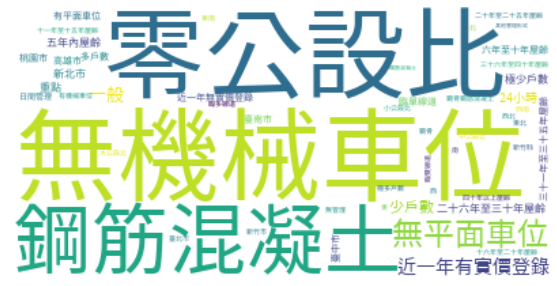

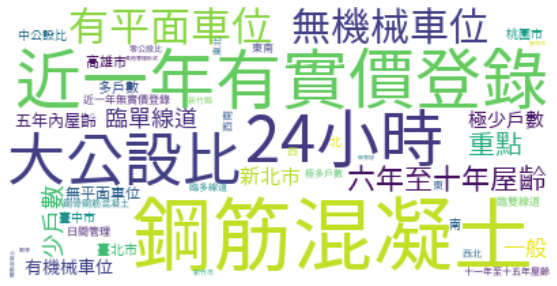

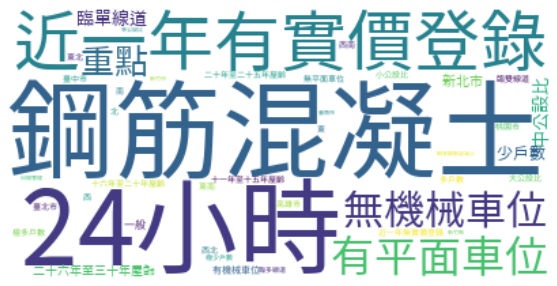

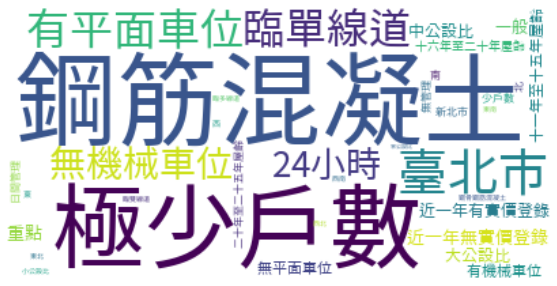

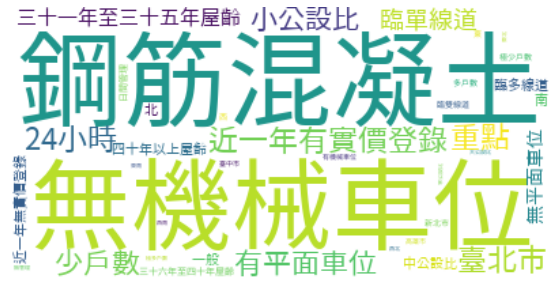

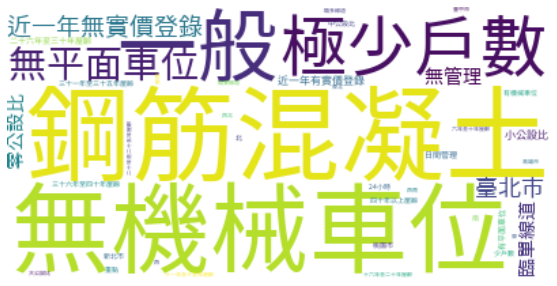

In [9]:
avg6_1 = clusterdf(cluster_avg_6,'cluster_avg_6',1)
avg6_2 = clusterdf(cluster_avg_6,'cluster_avg_6',2)
avg6_3 = clusterdf(cluster_avg_6,'cluster_avg_6',3)
avg6_4 = clusterdf(cluster_avg_6,'cluster_avg_6',4)
avg6_5 = clusterdf(cluster_avg_6,'cluster_avg_6',5)
avg6_6 = clusterdf(cluster_avg_6,'cluster_avg_6',6)

# Cluster 1
print("avg6_1 size: ", len(avg6_1.index))
text_a6_1 = textList(avg6_1)
dict_a6_1 = Counter(text_a6_1)

wordcloud_a6_1 = createWordCloud(dict_a6_1)
wordcloud_a6_1.words_ # check all the words with associated weights
showWordCloud(wordcloud_a6_1)

# Cluster 2
print("avg6_2 size: ", len(avg6_2.index))
text_a6_2 = textList(avg6_2)
dict_a6_2 = Counter(text_a6_2)

wordcloud_a6_2 = createWordCloud(dict_a6_2)
wordcloud_a6_2.words_ # check all the words with associated weights
showWordCloud(wordcloud_a6_2)

# Cluster 3
print("avg6_3 size: ", len(avg6_3.index))
text_a6_3 = textList(avg6_3)
dict_a6_3 = Counter(text_a6_3)

wordcloud_a6_3 = createWordCloud(dict_a6_3)
wordcloud_a6_3.words_ # check all the words with associated weights
showWordCloud(wordcloud_a6_3)

# Cluster 4
print("avg6_4 size: ", len(avg6_4.index))
text_a6_4 = textList(avg6_4)
dict_a6_4 = Counter(text_a6_4)

wordcloud_a6_4 = createWordCloud(dict_a6_4)
wordcloud_a6_4.words_ # check all the words with associated weights
showWordCloud(wordcloud_a6_4)

# Cluster 5
print("avg6_5 size: ", len(avg6_5.index))
text_a6_5 = textList(avg6_5)
dict_a6_5 = Counter(text_a6_5)

wordcloud_a6_5 = createWordCloud(dict_a6_5)
wordcloud_a6_5.words_ # check all the words with associated weights
showWordCloud(wordcloud_a6_5)

# Cluster 6
print("avg6_6 size: ", len(avg6_6.index))
text_a6_6 = textList(avg6_6)
dict_a6_6 = Counter(text_a6_6)

wordcloud_a6_6 = createWordCloud(dict_a6_6)
wordcloud_a6_6.words_ # check all the words with associated weights
showWordCloud(wordcloud_a6_6)

###**3.3 Ward Cluster**

####3 clusters

ward3_1 size:  10017
ward3_2 size:  2595
ward3_3 size:  5584


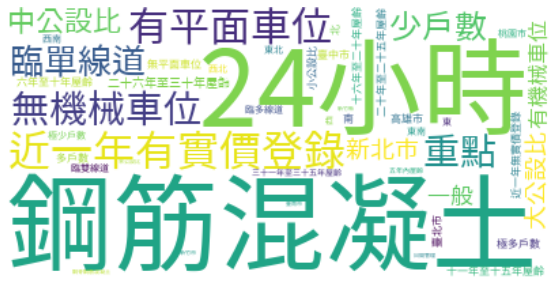

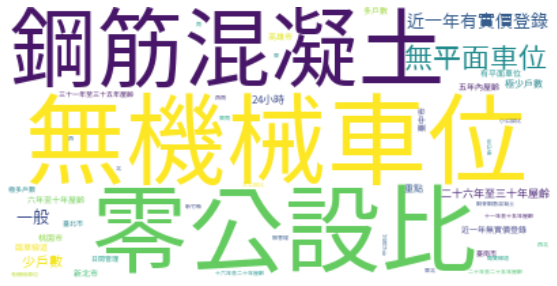

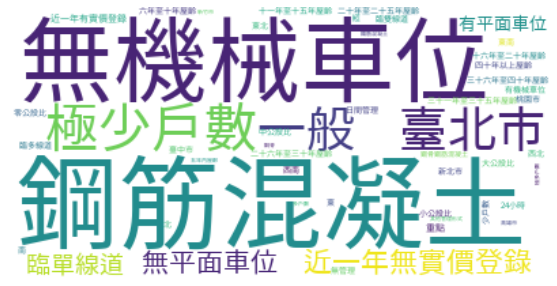

In [10]:
ward3_1 = clusterdf(cluster_ward_3,'cluster_ward_3',1)
ward3_2 = clusterdf(cluster_ward_3,'cluster_ward_3',2)
ward3_3 = clusterdf(cluster_ward_3,'cluster_ward_3',3)

# Cluster 1
print("ward3_1 size: ", len(ward3_1.index))
text_w3_1 = textList(ward3_1)
dict_w3_1 = Counter(text_w3_1)

wordcloud_w3_1 = createWordCloud(dict_w3_1)
wordcloud_w3_1.words_ # check all the words with associated weights
showWordCloud(wordcloud_w3_1)

# Cluster 2
print("ward3_2 size: ", len(ward3_2.index))
text_w3_2 = textList(ward3_2)
dict_w3_2 = Counter(text_w3_2)

wordcloud_w3_2 = createWordCloud(dict_w3_2)
wordcloud_w3_2.words_ # check all the words with associated weights
showWordCloud(wordcloud_w3_2)

# Cluster 3
print("ward3_3 size: ", len(ward3_3.index))
text_w3_3 = textList(ward3_3)
dict_w3_3 = Counter(text_w3_3)

wordcloud_w3_3 = createWordCloud(dict_w3_3)
wordcloud_w3_3.words_ # check all the words with associated weights
showWordCloud(wordcloud_w3_3)


####4 clusters

ward4_1 size:  2106
ward4_2 size:  7911
ward4_3 size:  2595
ward4_4 size:  5584


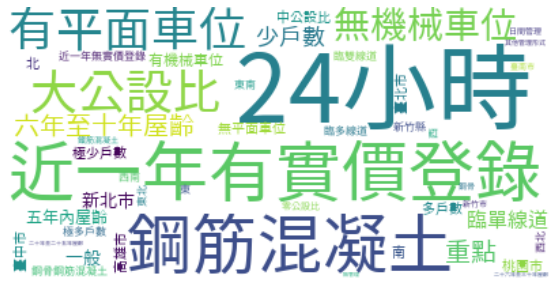

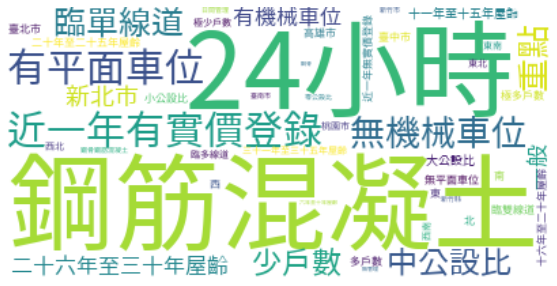

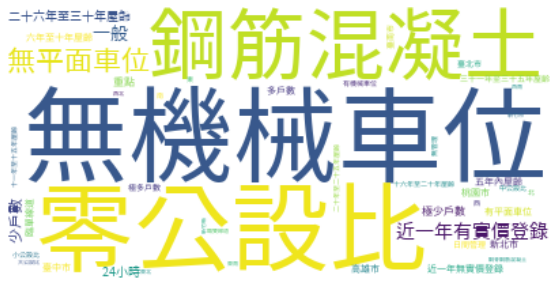

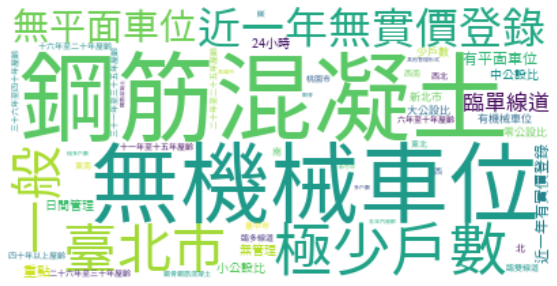

In [11]:
ward4_1 = clusterdf(cluster_ward_4,'cluster_ward_4',1)
ward4_2 = clusterdf(cluster_ward_4,'cluster_ward_4',2)
ward4_3 = clusterdf(cluster_ward_4,'cluster_ward_4',3)
ward4_4 = clusterdf(cluster_ward_4,'cluster_ward_4',4)

# Cluster 1
print("ward4_1 size: ", len(ward4_1.index))
text_w4_1 = textList(ward4_1)
dict_w4_1 = Counter(text_w4_1)

wordcloud_w4_1 = createWordCloud(dict_w4_1)
wordcloud_w4_1.words_ # check all the words with associated weights
showWordCloud(wordcloud_w4_1)

# Cluster 2
print("ward4_2 size: ", len(ward4_2.index))
text_w4_2 = textList(ward4_2)
dict_w4_2 = Counter(text_w4_2)

wordcloud_w4_2 = createWordCloud(dict_w4_2)
wordcloud_w4_2.words_ # check all the words with associated weights
showWordCloud(wordcloud_w4_2)

# Cluster 3
print("ward4_3 size: ", len(ward4_3.index))
text_w4_3 = textList(ward4_3)
dict_w4_3 = Counter(text_w4_3)

wordcloud_w4_3 = createWordCloud(dict_w4_3)
wordcloud_w4_3.words_ # check all the words with associated weights
showWordCloud(wordcloud_w4_3)

# Cluster 4
print("ward4_4 size: ", len(ward4_4.index))
text_w4_4 = textList(ward4_4)
dict_w4_4 = Counter(text_w4_4)

wordcloud_w4_4 = createWordCloud(dict_w4_4)
wordcloud_w4_4.words_ # check all the words with associated weights
showWordCloud(wordcloud_w4_4)


##**4. Cluster Comparison by Weights**


---



In [12]:
def feature_weight(cluster1, cluster2, cluster3):
  # df1 = pd.DataFrame(list(cluster1.words_.items()),columns=['Feature', 'cluster 1'])
  df1 = pd.DataFrame.from_dict(cluster1, orient='index').rename(columns={0:'cluster 1'})
  df2 = pd.DataFrame.from_dict(cluster2, orient='index').rename(columns={0:'cluster 2'})
  df3 = pd.DataFrame.from_dict(cluster3, orient='index').rename(columns={0:'cluster 3'})
  return pd.concat([df1, df2, df3], axis=1) # order by df1 weights
  # order by feature character
  # df = df1.join(df2, how='outer')
  # return df.join(df3, how='outer')

In [13]:
# Complete-Link
df_c3 = feature_weight(wordcloud_c3_1.words_, wordcloud_c3_2.words_, wordcloud_c3_3.words_)
df_c3.to_excel("/content/gdrive/My Drive/碩一下/Capstone/hierarchical_clustering/v2/complete3.xlsx")
print("Complete-Link: ")
df_c3

Complete-Link: 


,cluster 1,cluster 2,cluster 3
鋼筋混凝土,1.000000,1.000000,1.000000
無機械車位,0.917326,0.899908,0.764795
一般,0.833845,0.242424,0.340548
無平面車位,0.792185,0.280992,0.151233
極少戶數,0.707089,0.344353,0.076849
近一年有實價登錄,0.570644,0.856749,0.917534
零公設比,0.552882,0.074992,0.034247
近一年無實價登錄,0.532860,0.287420,0.126438
臺北市,0.433554,0.667279,0.094110
臨單線道,0.376877,0.569330,0.649452


In [14]:
# Group Average
df_a3 = feature_weight(wordcloud_a3_1.words_, wordcloud_a3_2.words_, wordcloud_a3_3.words_)
df_a3.to_excel("/content/gdrive/My Drive/碩一下/Capstone/hierarchical_clustering/v2/average3.xlsx")
print("Group Average: ")
df_a3

Group Average: 


,cluster 1,cluster 2,cluster 3
無機械車位,1.000000,0.795787,0.821990
零公設比,0.970760,0.040105,0.201926
鋼筋混凝土,0.888053,1.000000,1.000000
無平面車位,0.883459,0.178627,0.531621
近一年有實價登錄,0.841688,0.936570,0.504815
一般,0.759398,0.339998,0.604655
少戶數,0.564745,0.565512,0.323114
24小時,0.351295,0.984291,0.470947
二十六年至三十年屋齡,0.286967,0.286802,0.134350
重點,0.278195,0.734857,0.467095


In [15]:
# Ward
df_w3 = feature_weight(wordcloud_w3_1.words_, wordcloud_w3_2.words_, wordcloud_w3_3.words_)
df_w3.to_excel("/content/gdrive/My Drive/碩一下/Capstone/hierarchical_clustering/v2/ward3.xlsx")
print("Ward: ")
df_w3

Ward: 


,cluster 1,cluster 2,cluster 3
24小時,1.000000,0.362615,0.335404
鋼筋混凝土,0.996389,0.893301,1.000000
近一年有實價登錄,0.916941,0.826715,0.453610
有平面車位,0.891662,0.171280,0.474185
無機械車位,0.788529,1.000000,0.831910
重點,0.742432,0.291617,0.394798
臨單線道,0.625491,0.157240,0.515140
少戶數,0.597132,0.531087,0.227290
中公設比,0.502815,0.049338,0.314247
大公設比,0.359002,0.012034,0.239519
